# Eigenvectors playbook

<p>
Mal Minhas, v0.1<br>
31.12.22
</p>

## Introduction

This is an introduction to **eigenvalues** and **eigenvectors** which play a very important role in many applications in science and engineering. The prefix _eigen-_ is adopted from the German word eigen for “proper”, “characteristic”

They have many applications, to name a few, finding the natural frequencies and mode shapes in dynamics systems, solving differential equations, reducing the dimensions using principal components analysis, getting the principal stresses in the mechanics, and so on. Even Google’s search engine algorithm, PageRank, uses the eigenvalues and eigenvectors to assign scores to the pages and rank them in the search.

We learned from last chapter that matrix $A$ applied to column vector $x$, that is $Ax$, is a **linear transformation** of $x$. There is a special transform of the following form:

$Ax = \lambda{𝑥}$

where $A$ is an ${n}\times{n}$ matrix, $x$ is ${n}\times{1}$ non-zero column vector, and $\lambda$ is some scalar. Any $\lambda$ that satisfies the above equation is known as an eigenvalue of the matrix $A$, while the associated vector $x$ is called an eigenvector corresponding to $\lambda$ .


Eigenvalues and eigenvectors help us to understand the characteristics of the linear transformation. We know that a vector $x$ can be transformed to a different vector by multiplying it with $A$ to create the new vector $Ax$. The effect of the transformation represents a scale of the length of the vector and/or the rotate of the vector. 

Consider the vector $x = \begin{bmatrix}1\\1\end{bmatrix}$ and a transformation matrix $A$ which is $\begin{bmatrix}2 & 0\\0 & 1\end{bmatrix}$ and let's draw $A$ and $Ax$ to show the transformation:

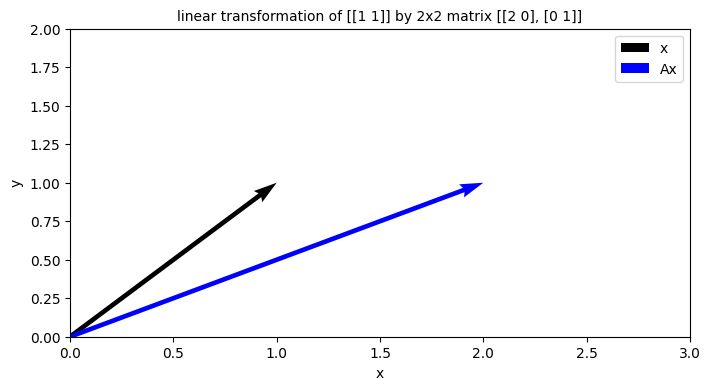

In [1]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

def plot_vect(x, A, Ax, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    A - the linear transformation
    Ax - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (8, 4))
    plt.quiver(0,0,x[0],x[1],color='k',angles='xy',scale_units='xy',scale=1,label='x')
    plt.quiver(0,0,Ax[0],Ax[1],color='b',angles='xy',scale_units='xy',scale=1,label ='Ax')
    plt.xlim(xlim)
    plt.ylim(ylim)
    reprA = np.array2string(A).replace('\n', ',')
    plt.title(f'linear transformation of {x.T} by 2x2 matrix {reprA}',fontsize=10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

A = np.array([[2, 0],[0, 1]])
x = np.array([[1],[1]])
Ax = np.dot(A, x)
plot_vect(x, A, Ax, (0,3), (0,2))

Now consider a different $x$ such that $x = \begin{bmatrix}1\\0\end{bmatrix}$

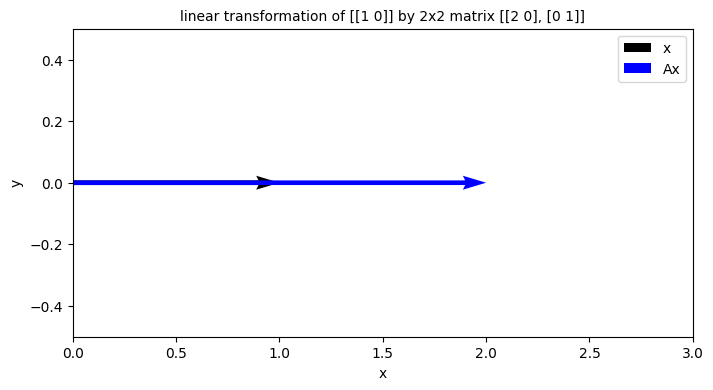

In [2]:
A = np.array([[2, 0],[0, 1]])
x = np.array([[1],[0]])
Ax = np.dot(A, x)
plot_vect(x, A, Ax, (0,3), (-0.5,0.5))

We observe that with this new vector, the only thing changed after the transformation is the length of the vector.  The original vector is stretched by the transformation and becomes $\begin{bmatrix}2\\0\end{bmatrix}$ meaning the transformation is a special one:

$Ax = 2x$

So $x = \begin{bmatrix}1\\0\end{bmatrix}$ is therefore an eigenvector of $A$.

## Characteristic equation

In order to get the eigenvalues and eigenvectors from $Ax = \lambda{𝑥}$, we start with the following rearrangement:

$(A - \lambda{I})x = 0$

where $I$ is the identify matrix with the same dimensions as $A$. If matrix $A - \lambda{I}$ has an inverse, then multiply both sides with $(A - \lambda{I})^{-1}$, we get a trivial solution $x=0$. Therefore, when $A - \lambda{I}$ is singular (no inverse exist), we have a nontrivial solution, which means that the determinant is zero:

$det(A - \lambda{I}) = 0$

This equation is called **characteristic equation**, which will lead to a polynomial equation for $\lambda$, then we can solve for the eigenvalues. Here's an example.

The $2\times{2}$ matrix $\begin{bmatrix}0 & 2\\2 & 3\end{bmatrix}$ yields the characteristic equation:
   
$\begin{bmatrix}-\lambda & 2\\2 & {3 - \lambda}\end{bmatrix} = 0$

Therefore, we have:

$-\lambda{(3-\lambda)} -4 = 0 \implies {\lambda}^2 - 3\lambda - 4 = 0$

which yields the following two solutions which are our **eigenvalues**:

$\lambda_{1} = 4, \lambda_{2} = -1$

To calculate our **eigenvectors** we insert the eigenvalues back into the characteristic equation one at a time.  For $\lambda = 4$ this yields:

$\begin{bmatrix}-4 & 2\\2 & -1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix} = \begin{bmatrix}0\\0\end{bmatrix}$

which in turn yields two equations $−4x_1 + 2x_2 = 0$ and $2x_1 − x_2 = 0$, both of which indicate that $x_2 = 2x_1$. Therefore, we can have the first eigenvector as:

$x_1 = k_1\begin{bmatrix}1\\2\end{bmatrix} = 0$

$k_1$ is a scalar vector ($k+1 \neq 0$).  As long as we have a ratio of two between $x_2$ and $x_1$, it will be an eigenvector. 

By inserting $\lambda_2 = −1$ similarly as above, we can get the other eigenvector as the following:

$x_2 = k_2\begin{bmatrix}-2\\1\end{bmatrix} = 0$

We can now see how to get the eigenvalues and eigenvectors from a matrix $A$. However, things become really complicated when you have a larger matrix $A$.  You have to then solve the $n_{th}$ order polynomial characteristic equation. Luckily, there are many different numerical methods have been developed to solve the eigenvalue problems for larger matrices.  These methods include:
* **Power method**: In some problems, we only need to find the largest dominant eigenvalue and its corresponding eigenvector. The power method is an iterative method that will converge to the largest eigenvalue.  Explanation and Python implementation [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.02-The-Power-Method.html).
* **QR method**: The QR method is a preferred iterative method to find all the eigenvalues of a matrix (but not the eigenvectors at the same time). The idea is based on the following two concepts: i) similar matrices will have the same eigenvalues and associated eigenvectors. Two square matrices $A$ and $B$ are similar if: $A = C^{-1}BC$ where $C$ is an invertible matrix, ii) The QR method is a way to decompose a matrix into two matrices $Q$ and $R$, where $Q$ is an orthogonal matrix, and $R$ is an upper triangular matrix.


## Eigenvalues and Eigenvectors in Python

Although the Power and QR methods look complicated, the actually calculation of the eigenvalues and eigenvectors in Python is fairly easy. The main built-in function to solve the eigenvalue/eigenvector problem for a square array is `eig` in `numpy.linalg`.  

Here is how we calculate them for our matrix $A = \begin{bmatrix}0 & 2\\2 & 3\end{bmatrix}$ from the previous section:

In [3]:
import numpy as np
from numpy.linalg import eig

a = np.array([[0, 2], 
              [2, 3]])
w,v=eig(a)
print('Eigenvalues:', w)
print('Eigenvectors:', v)

Eigenvalues: [-1.  4.]
Eigenvectors: [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


Let's try with a more complicated $A = \begin{bmatrix}2 & 2 & 4\\1 & 3 & 5\\2 & 3 & 4\end{bmatrix}$:

In [4]:
a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
w,v=eig(a)
print('Eigenvalues:', w)
print('Eigenvectors:', v)

Eigenvalues: [ 8.80916362  0.92620912 -0.73537273]
Eigenvectors: [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


## Summary

* Eigenvalues and eigenvectors help us to understand the characteristics of the linear transformation.
* Eigenvectors of a matrix are the vectors that only be scaled length without rotation after the matrix transformation, the eigenvalues are the factors of the scale.
* We can use power method to get the largest eigenvalue and corresponding eigenvector of a matrix.
* The inverse power method can help us to get the smallest eigenvalue and corresponding eigenvector of a matrix.
* The shifted power method can get all the other eigenvectors/eigenvectors of a matrix.
* The preferred method to get all the eigenvalues is the QR method
* Use `numpy.linalg.eig` to calculate eigenvectors and eigenvectors for square matrices